# Performance Bencharmk: Accessing Datasets in the Jasmin Object Store

In [1]:
import warnings

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import chain

from performance_plots import plot_barplot, plot_lineplot
from performance_utils import calculate_speed_up

In [2]:
# Warning settings
warnings.filterwarnings("ignore")

# Seaborn settings
sns.set()
sns.set_style("white")
sns.set_context("notebook", font_scale=0.95)

# Matplotlib settings
plt.rcParams.update({"xtick.bottom": True, "ytick.left": True})

In [3]:
output_file_prefix = "performance_annual_mean_depth_profile_grid"
save_fig = False
error_kwargs = {"capsize": 0.1, "errwidth": 1, "errorbar": "sd"}

## Annual Mean Depth Profile of a Grid Point

In [8]:
# Open the csvs file
df_grid = pd.read_csv(
    "benchmark_data/csv_files/performance_annual_mean_depth_profile_grid.csv"
)
df_surf = pd.read_csv(
    "benchmark_data/csv_files/performance_annual_mean_surface_layer.csv"
)
df_ft_area = pd.read_csv(
    "benchmark_data/csv_files/performance_full_time_area_average.csv"
)

df_grid["Computation"] = "Annual Mean Depth Profile of a Grid Point"
df_surf["Computation"] = "Annual Mean of the Surface Layer"
df_ft_area["Computation"] = "Area-average Full Time"
# df_ft_depth["Computation"] = "Depth-average Full Time"

# Concatenate and select desired data
dfs = [df_grid, df_surf, df_ft_area]
df = pd.concat(dfs)
df.query("`Number of cores` == 16 & Label == 'mixed-2'", inplace=True)

### Walltime as a function of the number of cores

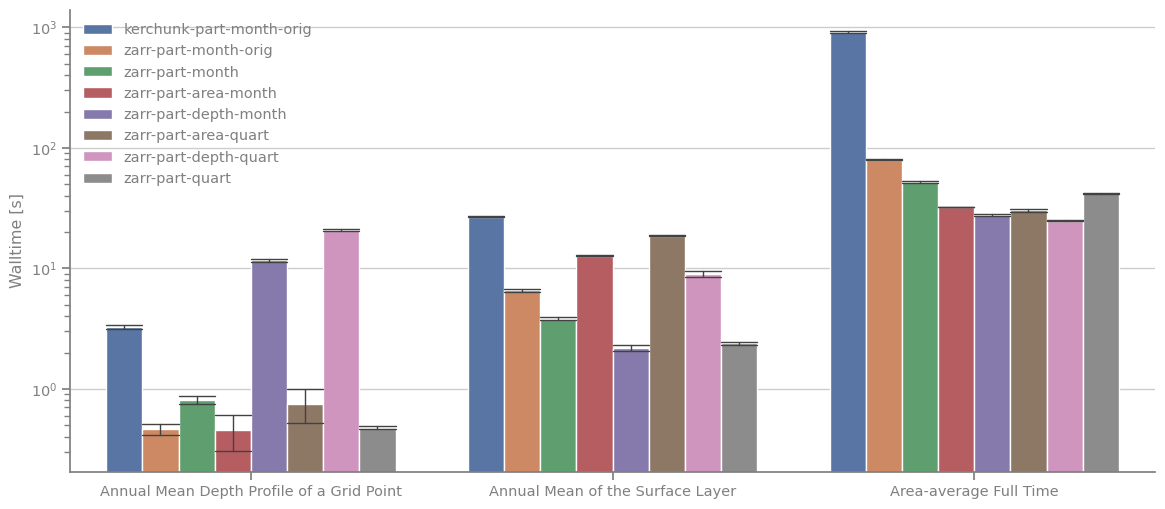

In [9]:
f, ax = plt.subplots(figsize=(14, 6))
ax = plot_barplot(
    ax,
    df,
    x="Computation",
    y="Walltime",
    hue="Dataset",
    leg_title="",
    error_kwargs=error_kwargs,
)
if save_fig:
    plt.savefig(
        f"{output_file_prefix}_global_walltime_vs_ncores.png",
        dpi=300,
        transparent=True,
        bbox_inches="tight",
    )
plt.show()